In [7]:
from pathlib import Path
from typing import List
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import torch
import pytorch_lightning
from pytorch_lightning import loggers, Trainer

from dhdrnet.lightning_model import DHDRNet
from dhdrnet.util import DATA_DIR
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (20,10)
%load_ext autoreload

%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Want to check that basic assumptions make sense..
Are more possible EV's needed? or maybe the fusion alg needs to be updated
First step is check best possible fusion results with all available algorithms.

In [8]:
# Let's load the dng images and adjust the exposure on the fly.
raw_imgs = np.array(list((DATA_DIR / "dngs").iterdir()))

In [9]:
from PIL import Image
from itertools import product

# All of the data will be saved to disk here
out_dir = DATA_DIR / "sanity" / "all_fused"
def get_multi_exposures(dng, ev_steps):
    pass

# compute all fusion steps with different EVS and selected params --- grid search essentially
def gen_all_fuse(fuse_funcs, raw_images:List[Path], gt_images: List[Path], out_dir):
    all_ev_steps = range(5, 10)
    all_combinations = product(fuse_funcs, all_ev_steps, zip(raw_images, gt_images))
    raw: Path
    gt: Path
    for ff, ev_steps, (raw, gt) in all_combinations:
        exposures = get_multi_exposures(raw, ev_steps)
        exp_choices = exposures[np.random.choice(len(exposures), 2)]
        fused: Image = ff(exp_choices)
        # save the results to disk
        fused.save(out_dir / f"{raw.stem}.png")


/home/smsx/src/DHDRNet/.venv/lib/python3.8/site-packages/colour/utilities/verbose.py:235: ColourUsageWarning: "OpenImageIO" related API features are not available, switching to "Imageio"!
  warn(*args, **kwargs)


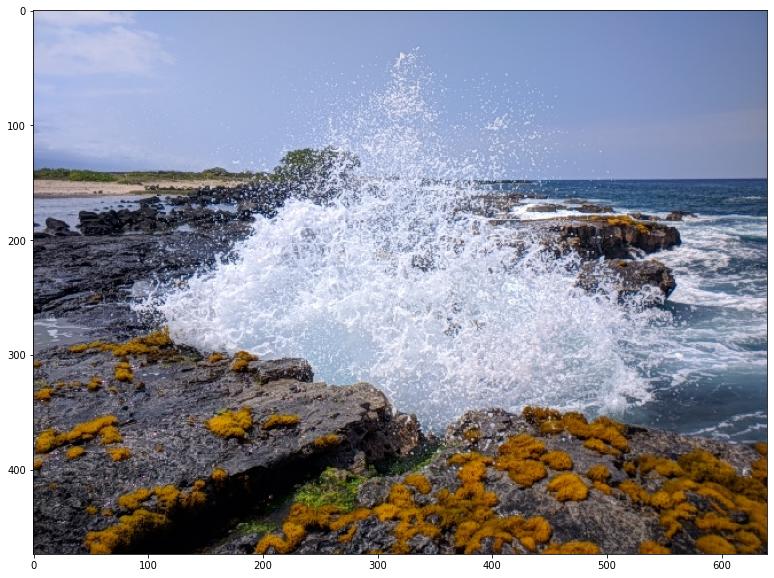

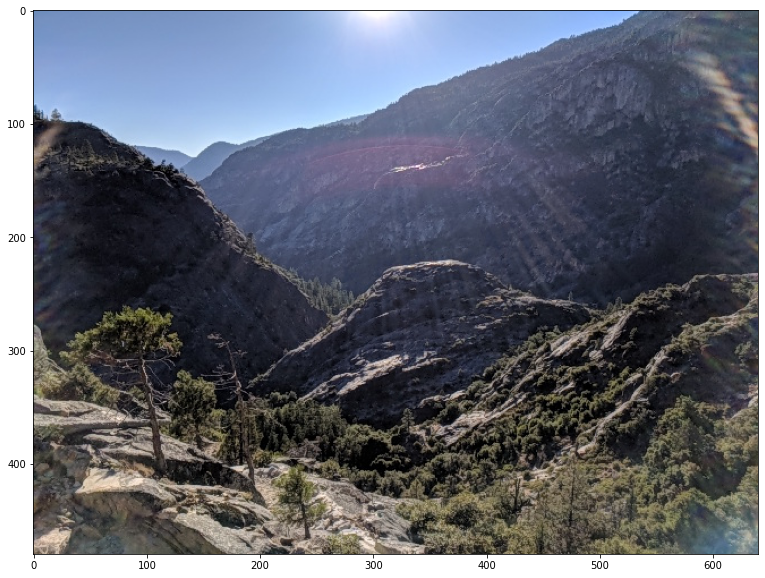

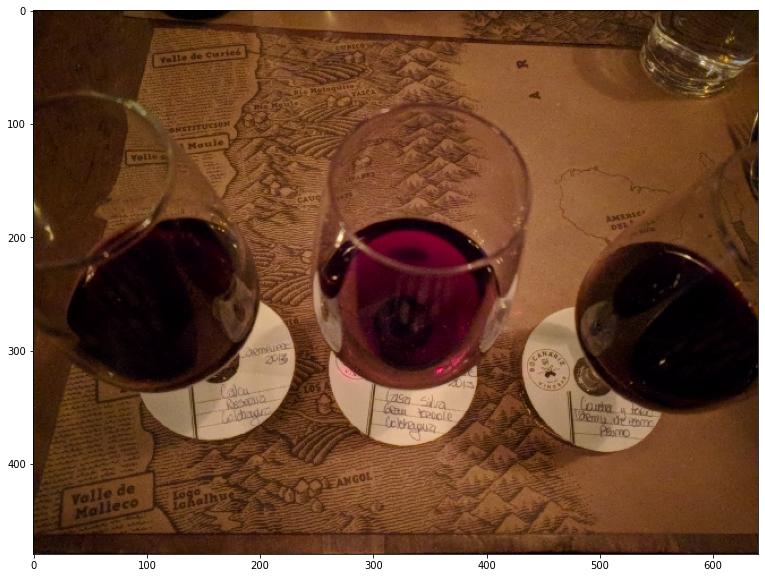

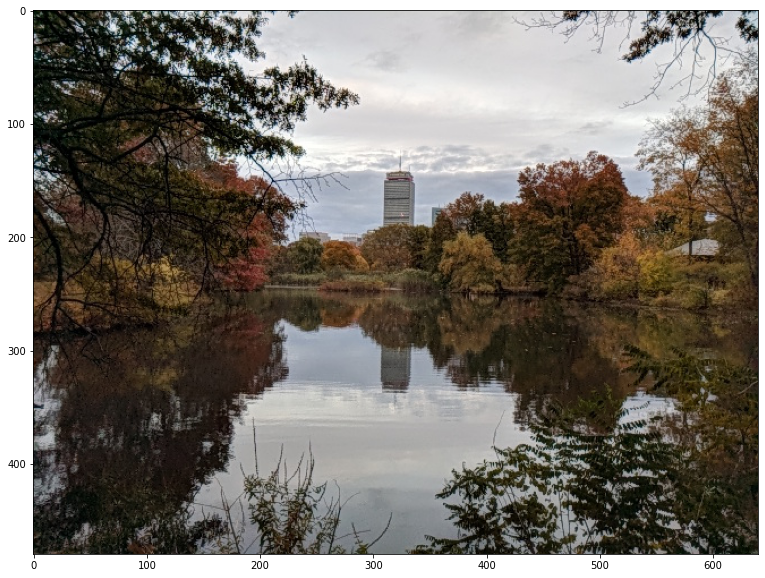

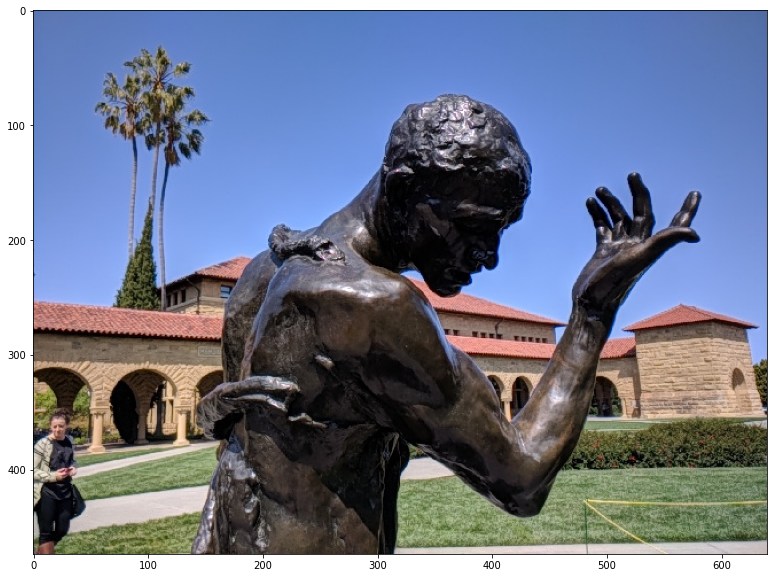

In [26]:
# hold up for another test
from dhdrnet import util
import colour_hdri as ch
import colour as co
dng_sample = np.random.choice(raw_imgs,5)
loaded_raw = [co.read_image(dng_p) for dng_p in dng_sample]
for dsi in loaded_raw:
    plt.figure()
    plt.imshow(dsi)

In [28]:
image_stacks = []

ev_steps = np.linspace(-4,4,5)
for im in loaded_raw:
    stack = ch.ImageStack()
    for i, ev in enumerate(ev_steps):
        me = ch.adjust_exposure(im,ev)
        im = ch.Image()
        im.data = me
        im.metadata = util.compute_metadata(ev)
        stack.insert(i,me)
    image_stacks.append(stack)

TypeError: float() argument must be a string or a number, not 'Image'

In [ ]:
fused1 = ch.image_stack_to_radiance_image(image_stacks[0])
plt.figure()
plt.imshow(fused1)


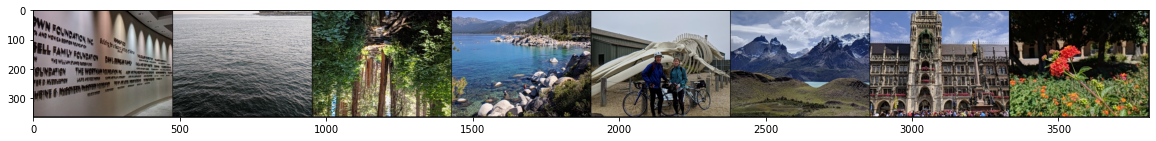

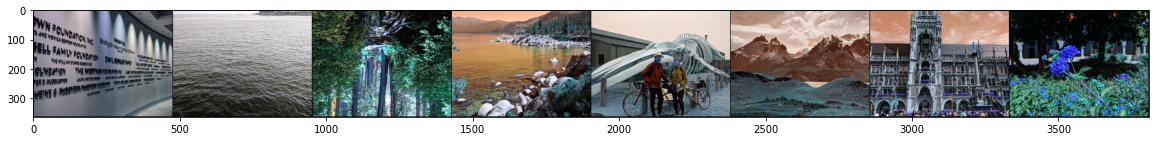

In [31]:
from dhdrnet.util import ROOT_DIR
gt_im = plt.imread(ROOT_DIR / "individualImage.png")
out_im = plt.imread(ROOT_DIR / "individualImage1.png")
plt.imshow(gt_im)
plt.figure()
plt.imshow(out_im)

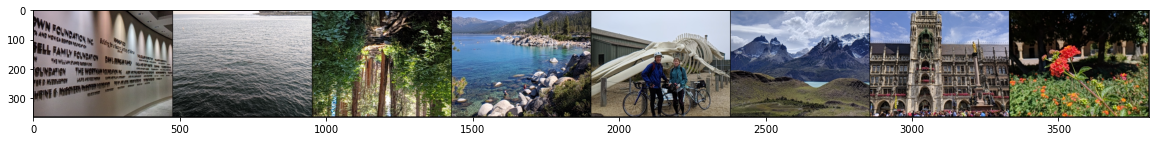

In [33]:
im_bgr = out_im
im_rgb = im_bgr[:,:,[2, 1, 0]]
plt.imshow(im_rgb)